# Image Watermarking
---
**What does this Project do?**

- This project builds up a program to automatically add image or text watermark to pictures

**What is the Business Impact & Purpose of this Project?**

- Adding a watermark to an image works as a copyright for companies. Different organizations can add trademarks to make their content secure and cannot be misused without their licensse or paid version
- It is easy to add watermark with PS and other image processing tools when there are limited amount of files
- However, it takes much more human repeatable work when there are a lot of files that need to be added watermarks
- This program can help automate the process and reduce a lot of human extra work

**How to Build Up this Project?**

1. Set up the library and images
2. Convert the images into RGB format and then into numpy array
3. Calculate the height and weight of the image and logo
4. Calculate the coordinate of the target watermark
5. Find out the region of interest to draw the logo and merge logo with the image
6. Create the Text watermark aand use cv2 to apply the watermark
7. Convert the image back to RGB and display it
---


## Set up the Library and Images

In [1]:
# Import library
import cv2
import numpy as np
import requests
from PIL import Image


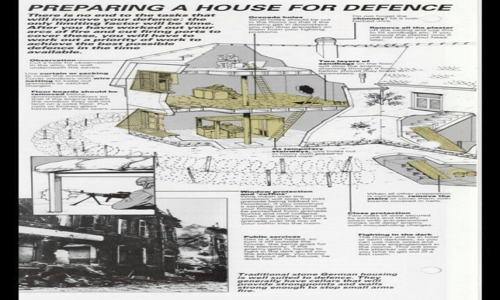

In [2]:
# Reading the images (needs to be added watermark) from url
image = Image.open(requests.get('https://i.imgur.com/dbuDMDb.jpeg', stream=True).raw)

image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

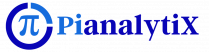

In [3]:
# Reading logo form url

logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream=True).raw)
logo

In [4]:
# Conver the images into rbg format and store it as numpy array
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

## Add a Logo Watermark

In [5]:
# Get the center of the original as the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)

top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)

bottom_y = top_y + h_logo
right_x = left_x + w_logo

> `h_logo` and `w_logo` are extracted from the logo shape in the numpy array

> Thus we can set the logo in the **middle of the image** with coordinates based on calculation of width and height

In [6]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)

# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)

# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

> A `Region of Interest (ROI)` defined as the area we need to place our watermark on. 

> We can find ou the `ROI` using the coordinates and then use `OpenCV` to merge our logo on `ROI`.

> ```Syntax: cv2.line(image, start_point, end_point, color, thickness)```

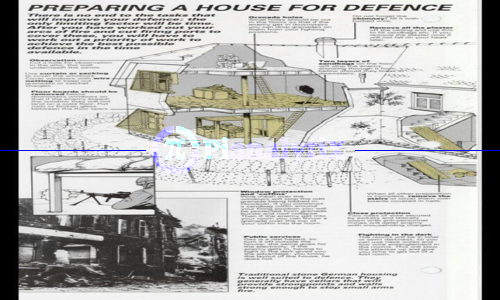

In [7]:
# Convert the image from numpy arrary back to RGB and plot it
img = Image.fromarray(image_logow, 'RGB')
img

## Add a Text Watermark

In [8]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Watermark-Test', org=(w_image - 160, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4); 

> We use the `putText` from cv2 to add the text watermark

> ```Syntax: cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])```

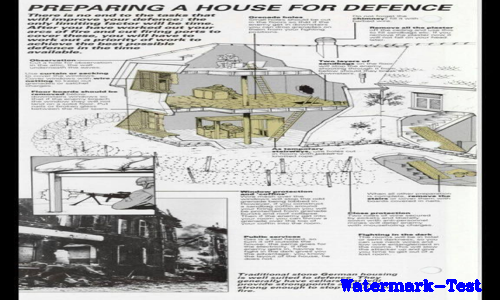

In [9]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg